# 3章 データを統計量で記述する

## 3.1 平均を求める

In [1]:
shortlist = [1, 2, 3]
sum(shortlist)

6

In [2]:
len(shortlist)

3

In [4]:
'''
Caluculatin the mean
'''

def calculate_mean(numbers):
    s = sum(numbers)
    N = len(numbers)
    
    # calculate the mean
    mean = s/N
    
    return mean

if __name__ == '__main__':
    donations = [100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200]
    mean = calculate_mean(donations)
    N = len(donations)
    print('Mean donation over the last {0} days is {1}'.format(N, mean))

Mean donation over the last 12 days is 477.75


## 3.2 中央値を求める

In [5]:
samplelist = [4, 1, 3]
samplelist.sort()
samplelist

[1, 3, 4]

In [7]:
'''
Calculating the median
'''

def calculate_median(numbers):
    N = len(numbers)
    numbers.sort()
    
    # find the median
    if N % 2 == 0:
        # if N is even
        m1 = N/2
        m2 = (N/2) + 1
        # convert to integer, match position
        m1 = int(m1) - 1
        m2 = int(m2) - 1
        median = (numbers[m1] + numbers[m2]) / 2
    else:
        m = (N + 1) / 2
        # convert to integer, match position
        m = int(m) - 1
        median = numbers[m]
    
    return median

if __name__ == '__main__':
    donations = [100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200]
    median = calculate_median(donations)
    N = len(donations)
    print('Median donation over the last {0} days is {1}'.format(N, median))

Median donation over the last 12 days is 500.0


## 3.3 最頻値を求め度数分布表を作る

### 3.3.1 一番多い要素を見つける

In [8]:
simplelist = [4, 2, 1, 3, 4]
from collections import Counter
c = Counter(simplelist)
c.most_common()

[(4, 2), (1, 1), (2, 1), (3, 1)]

In [10]:
mode = c.most_common()
mode

[(4, 2), (1, 1), (2, 1), (3, 1)]

In [11]:
mode[0]

(4, 2)

In [12]:
mode[0][0]

4

### 3.3.2 最頻値を探す

In [3]:
'''
Calculating the mode
'''

from collections import Counter

def calculate_mode(numbers):
    c = Counter(numbers)
    mode = c.most_common(1)
    return mode[0][0]

if __name__ == '__main__':
    scores = [7,8,9,2,10,9,9,9,9,4,5,6,1,5,6,7,8,6,1,10]
    mode = calculate_mode(scores)
    
    print('The mode of the list of numbers is: {0}'.format(mode))

The mode of the list of numbers is: 9


In [5]:
'''
Calculating the mode when the list of numbers may
have multiple modes
'''

from collections import Counter

def calculate_mode(numbers):
    c = Counter(numbers)
    numbers_freq = c.most_common()
    max_count = numbers_freq[0][1]
    
    modes = []
    
    for num in numbers_freq:
        if num[1] == max_count:
            modes.append(num[0])
            
    return modes

if __name__ == '__main__':
    scores = [5,5,5,4,4,4,9,1,3]
    modes = calculate_mode(scores)
    
    print('The mode(s) of the list of numbers are: {0}')
    
    for mode in modes:
        print(mode)

The mode(s) of the list of numbers are: {0}
4
5


### 3.3.3 度数分布表を作る

In [6]:
'''
Frequency table for a list of numbers
'''

from collections import Counter

def frequency_table(numbers):
    table = Counter(numbers)
    print('Number\tFrequency')
    
    for number in table.most_common():
        print('{0}\t{1}'.format(number[0], number[1]))
        
if __name__ == '__main__':
    scores = [7,8,9,2,10,9,9,9,9,4,5,6,1,5,6,7,8,6,1,10]
    frequency_table(scores)

Number	Frequency
9	5
6	3
1	2
5	2
7	2
8	2
10	2
2	1
4	1


In [7]:
'''
Frequency table for a list of numbers
Enhanced to display the table sorted by the numbers
'''

from collections import Counter

def frequency_table(numbers):
    table = Counter(numbers)
    numbers_freq = table.most_common()
    numbers_freq.sort()
    
    print('Number\tFrequency')
    
    for number in numbers_freq:
        print('{0}\t{1}'.format(number[0], number[1]))
        
if __name__ == '__main__':
    scores = [7,8,9,2,10,9,9,9,9,4,5,6,1,5,6,7,8,6,1,10]
    frequency_table(scores)

Number	Frequency
1	2
2	1
4	1
5	2
6	3
7	2
8	2
9	5
10	2


## 3.4 散らばりを計る

### 3.4.1 数集合の範囲を決める

In [2]:
'''
Find the range
'''

def find_range(numbers):
    lowest = min(numbers)
    highest = max(numbers)
    # fins the range
    r = highest - lowest
    
    return lowest, highest, r

if __name__ == '__main__':
    donations = [ 100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200]
    lowest, highest, r = find_range(donations)
    print('Lowest: {0} Highest: {1} Range: {2}'.format(lowest, highest, r))


Lowest: 60 Highest: 1200 Range: 1140


In [3]:
### 3.4.2 分散と標準偏差を求める

In [4]:
'''
Find the variance and standard deviation of a list of numbers
'''
def calculate_mean(numbers):
    s = sum(numbers)
    N = len(numbers)
    # calculate the mean
    mean = s/N
    return mean

def find_differences(numbers):
    # find the mean
    mean = calculate_mean(numbers)
    # find the differences from the mean
    diff = []
    
    for num in numbers:
        diff.append(num-mean)

    return diff

def calculate_variance(numbers):
    # find the list of differences
    diff = find_differences(numbers)
    # find the squared differences
    squared_diff = []
    
    for d in diff:
        squared_diff.append(d**2)

    #find the variance
    sum_squared_diff = sum(squared_diff)
    variance = sum_squared_diff/len(numbers)

    return variance

if __name__ == '__main__':
    donations = [100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200]
    variance = calculate_variance(donations)
    print('The variance of the list of numbers is {0}'.format(variance))
    std = variance**0.5
    print('The standard deviation of the list of numbers is {0}'.format(std))

The variance of the list of numbers is 141047.35416666666
The standard deviation of the list of numbers is 375.5627166887931


## 3.5 2つのデータセットの相関を計算する

### 3.5.1 相関関係を計算する

In [ ]:
def find_corr_x_y(x, y):
    n = len(x)

    # find the sum of the products
    prod = []

    for xi, yi in zip(x, y):
        prod.append(xi * yi)

    sum_prod_x_y = sum(prod)

    sum_x = sum(x)
    sum_y = sum(y)
    squared_sum_x = sum_x ** 2
    squared_sum_y = sum_y ** 2

    x_square = []

    for xi in x:
        x_square.append(xi ** 2)

    # find the sum
    x_square_sum = sum(x_square)

    y_square = []

    for yi in y:
        y_square.append(yi ** 2)

    # find the sum
    y_square_sum = sum(y_square)

    # use formula to calculate correlation
    numerator = n * sum_prod_x_y - sum_x * sum_y
    denominator_term1 = n * x_square_sum - squared_sum_x
    denominator_term2 = n * y_square_sum - squared_sum_y

    denominator = (denominator_term1 * denominator_term2) ** 0.5
    correlation = numerator / denominator

    return correlation

### 3.5.2 高校の成績と大学入試の点数

In [ ]:
high_school_grades = [90, 92, 95, 96, 87, 87, 90, 95, 98, 96]
colledge_admission_test_scores = [85, 87, 86, 97, 96, 88, 89, 98, 98, 87]

print(find_corr_x_y(high_school_grades, colledge_admission_test_scores))

## 3.6 散布図

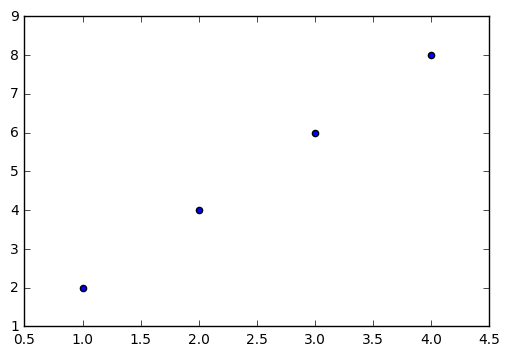

In [2]:
x = [1, 2, 3, 4]
y = [2, 4, 6, 8]

import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()